In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Objective

##### The main objective of this research to see and analyse comprehensively the historical crime trends, with more emphasising on recording the number of rape cases happening in different cities and its jurisdictions from 1975 to 2015. Our main focus is to carefully examine the valuable insights form this large dataset. The research can be summarized as follows:
##### This research wil make us walkthrough teh geographical disparities of rates of different crimes to dscover the areas of highest number of crime rates and in which year are they most recorded. Our ultimate target to support efforts like doing social programs or early intervention strategies or making predictive policies to a data informed decision making.
##### For the dataset we have taken the data from the website Kaggle with the name " Crime in Context 1975 to 2015". This is our attempt to make stakeholder recognise that with the knowledge and resources they can minimise the crime rate and making community safer to a great extent by implementing the good solution and for that it is important to utilize and grab the historical data of crime rates.

In [3]:
# Upload the data and read it
crime_df = pd.read_csv("crime.csv")

# Data Exploration
### To explore the data:
##### 1) We have first taken first 10 rows of the data just to get the overview of the data.
##### 2) To get the insight of the data we have calculate the percentile of the data to check the numerical values distribution in the dataset or we can call it summary of statistics.
##### 3) There were many missing values in the data so to check how many missing values is in the data as to get accurate result so it is important to know so that it can be removed.
##### 4) It is also imporatant to check relationship between all the numerical variables in the dataset and for that it is to calculate correlation matrix of all the numerical variable.

In [4]:
c = crime_df.head(10)
c

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


In [5]:
# Percentiles for numerical columns
per = crime_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])
per

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
90%,2011.000000,1.270623e+06,1.758450e+04,312.000000,749.700000,7862.400000,7464.800000,12.000000,1991.607000,31.986000,102.125000,1095.608000,914.219000
95%,2013.000000,1.955848e+06,3.103445e+04,563.100000,1181.100000,12068.200000,12315.550000,12.000000,2378.400000,40.662000,118.398000,1290.006000,1129.118500
99%,2015.000000,7.328165e+06,1.276720e+06,16468.780000,2887.230000,42333.000000,38430.510000,12.000000,3413.358200,58.366800,153.844600,1791.419600,1607.556800


In [6]:
# Check for missing values in the data
miss_values = crime_df.isnull().sum()
print("Missing values in every column:\n", miss_values)

Missing values in every column:
 report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64


In [7]:
# Calculate the correlation matrix
cor_matrix = crime_df.corr()
print("Cor Matrix", cor_matrix)

Cor Matrix                      report_year  population  violent_crimes  homicides  \
report_year             1.000000    0.066498       -0.004466  -0.023396   
population              0.066498    1.000000        0.843667   0.777767   
violent_crimes         -0.004466    0.843667        1.000000   0.987591   
homicides              -0.023396    0.777767        0.987591   1.000000   
rapes                  -0.107151    0.751673        0.886098   0.882889   
assaults                0.010825    0.844437        0.969106   0.890391   
robberies              -0.095505    0.805544        0.980196   0.941071   
months_reported        -0.000761   -0.008955        0.011614   0.013706   
crimes_percapita       -0.135834    0.025491       -0.062972  -0.062142   
homicides_percapita    -0.162473    0.011986       -0.054270  -0.037024   
rapes_percapita        -0.294407   -0.172994        0.072649   0.110951   
assaults_percapita     -0.006686   -0.028732        0.260434   0.241462   
robberies_perc

<ipython-input-7-015ae74f66df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = crime_df.corr()


# One Column Selection
##### To check the one column selection I have taken rapes as the major crime reported from 1975 to 2015. We have printed the 10 largest value of rapes that has happened and in which year has the most rape cases being reported.By looking at the data we can identify in which cities there is highest reported rape cases recorded. This information can be useful because after looking at the result following solutions and immediate steps can be taken on those countries.

In [8]:
# Select the 'rapes' column and print the 10 largest values
top_10_rapes = crime_df.nlargest(10, 'rapes')
print(top_10_rapes)

      report_year agency_code agency_jurisdiction  population  violent_crimes  \
179          1977     NY03030   New York City, NY   7481613.0        121916.0   
248          1978     NY03030   New York City, NY   7242886.0        122685.0   
731          1985     NY03030   New York City, NY   7183984.0        135152.0   
317          1979     NY03030   New York City, NY   7109420.0        132383.0   
41           1975     NY03030   New York City, NY   7422506.0        132182.0   
455          1981     NY03030   New York City, NY   7070429.0        156946.0   
662          1984     NY03030   New York City, NY   7167121.0        132292.0   
1183         1992     ILCPD00         Chicago, IL   2832901.0         84242.0   
386          1980     NY03030   New York City, NY   7035348.0        149549.0   
769          1986     ILCPD00         Chicago, IL   3003105.0         68909.0   

      homicides   rapes  assaults  robberies  months_reported  \
179      1557.0  3899.0   42056.0    74404.

# Sort
##### To sort the data we have taken 5 columns from the dataset of crime reported which are report year,assaults,populations, rapes and homicides. We have ordered the dataset on descending order. By doing this it will help us create new datasets. The X variable will help us print the determine quantity of the top rows. As we have set it to 10 in this instance, we will get the output of the top 10 rows.

##### The result will show the cities or jurisdictions with the highest reported rapes counts with the chosen columns, giving information on the places that experienced the greatest problems with rapes during the given year.

In [9]:
# Select the desired columns
select_columns = crime_df[['report_year', 'assaults', 'population', 'rapes', 'homicides']]

In [10]:
# Order the dataset by 'rapes' in descending order
sort_data = select_columns.sort_values(by='rapes', ascending=False)


In [11]:
# Taking 10 rows
x = 10
# Print the top 10 rows
print(sort_data.head(x))

      report_year  assaults  population   rapes  homicides
179          1977   42056.0   7481613.0  3899.0     1557.0
248          1978   43271.0   7242886.0  3882.0     1503.0
731          1985   50356.0   7183984.0  3880.0     1384.0
317          1979   44203.0   7109420.0  3875.0     1733.0
41           1975   43481.0   7422506.0  3866.0     1645.0
455          1981   43783.0   7070429.0  3862.0     1826.0
662          1984   47472.0   7167121.0  3829.0     1450.0
1183         1992   41080.0   2832901.0  3754.0      960.0
386          1980   43476.0   7035348.0  3711.0     1812.0
769          1986   33529.0   3003105.0  3708.0      754.0


## Series
### To see the series of the data:
##### 1) We grouped the data by calculating the sum of rape cases crime reported in the given years from 1975 to 2015 so that we can find and calculate aggregated statistics of total number of rapes for every year.
##### 2) We also printed the unique values of the crimes reported in the given year and it is imporatant to see the unique values so that we can understand the range of the dataset.
##### 3) We did the coding to find out the data type of the given columns given in the datasets so that it can help us process the data and do its analysis.
##### 4) We visualized the histogram that can help us provide and depict the numerical values of certain column such as rapes of the number of populations in different countries.
##### 5) We also did the coding to pick the record where rapes surpass the given threshold which is greater than 25 and filter that data.

In [12]:
# Group data by "report_year" and calculate the sum of rapes
year_rape_crimes = crime_df.groupby("report_year")["rapes"].sum()
print(year_rape_crimes)

report_year
1975    24357.0
1976    23928.0
1977    26356.0
1978    28148.0
1979    31494.0
1980    33002.0
1981    32042.0
1982    30681.0
1983    31800.0
1984    33679.0
1985    36204.0
1986    36736.0
1987    35221.0
1988    34588.0
1989    33592.0
1990    36541.0
1991    36058.0
1992    35249.0
1993    33328.0
1994    31375.0
1995    30041.0
1996    29340.0
1997    27730.0
1998    26494.0
1999    24679.0
2000    24552.0
2001    23934.0
2002    24305.0
2003    23461.0
2004    23174.0
2005    22746.0
2006    22190.0
2007    21141.0
2008    20160.0
2009    19895.0
2010    19660.0
2011    19573.0
2012    19709.0
2013    22739.0
2014    27107.0
2015    29423.0
Name: rapes, dtype: float64


In [13]:
# Print unique values for 'report_year'
unique_year = select_columns['report_year'].unique()
unique_year


array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [14]:
# Print the data types of the selected columns
data_types_crime = select_columns.dtypes
data_types_crime

report_year      int64
assaults       float64
population     float64
rapes          float64
homicides      float64
dtype: object

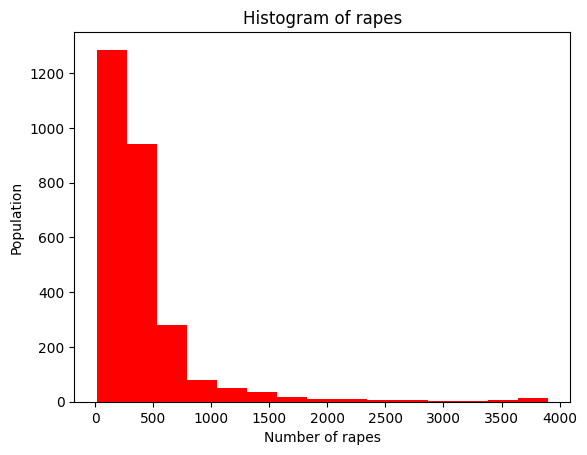

In [15]:
# Create a histogram for "rapes"
plt.hist(crime_df["rapes"], bins=15, color='red')
plt.title("Histogram of rapes")
plt.xlabel("Number of rapes")
plt.ylabel("Population")
plt.show()

In [16]:
# Filter data for records with rapes greater than a threshold
threshold = 25
filter_data = c[c['rapes'] > threshold]
print(filter_data)

   report_year agency_code   agency_jurisdiction  population  violent_crimes  \
0         1975     NM00101       Albuquerque, NM    286238.0          2383.0   
1         1975     TX22001         Arlington, TX    112478.0           278.0   
2         1975     GAAPD00           Atlanta, GA    490584.0          8033.0   
3         1975     CO00101            Aurora, CO    116656.0           611.0   
4         1975     TX22701            Austin, TX    300400.0          1215.0   
5         1975     MD00301  Baltimore County, MD    642154.0          1259.0   
6         1975     MDBPD00         Baltimore, MD    864100.0         16086.0   
7         1975     MA01301            Boston, MA    616120.0         11386.0   
8         1975     NY01401           Buffalo, NY    422276.0          3350.0   
9         1975     NC06001         Charlotte, NC    262103.0          1937.0   

   homicides  rapes  assaults  robberies  months_reported  crimes_percapita  \
0       30.0  181.0    1353.0      819.0

## Plot

##### We created the line plot which tells us that the trend of number of rape rapes cases reported in the given years in Austin, TX.On x axis we have taken the reported year and on y axis we have taken number of rape cases.By looking at the plot we can see the increasing trend in the number of rapes reported in Austin ,TX. In 2015 most number of rape cases has been reported.

In [17]:
# Data for the city of Austin, TX
austin_data = crime_df[crime_df['agency_jurisdiction'] == 'Austin, TX']

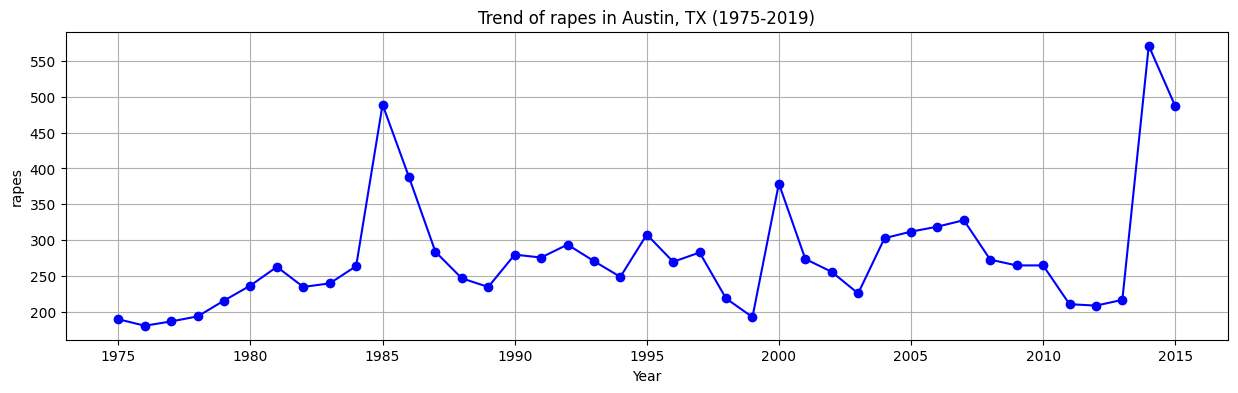

In [18]:
# Line plot
plt.figure(figsize=(15, 4))
plt.plot(austin_data['report_year'], austin_data['rapes'], marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('rapes')
plt.title('Trend of rapes in Austin, TX (1975-2019)')
plt.grid(True)

# Summary

### From our analysis we can see that:
##### 1) **Secular Fluctuations**: It can be seen that number of rape cases over the year has varied overtime in which in some years they are increasing or decreasing. There is no specfic trend like in 2015 most number of rape cases has been recorded.
##### 2) **Geographical Disparities**: It can be seen that different cities has different levels that are varying with each other with the specific crime mentioned which highlight the geographical disparities.
##### 3) **Crime per unit**: The result shows the crime per unit is allowing a fair comparisions between number of populations with number of rape cases in different cities and it can be seen that that number number of population does impact the crime rate mentioned.
##### 4) **Percistant bad news**: It can be seen that most high number of rape cases are reported in the cities like Austin, Anlanta and Boston.

###### This is taken from chatgpt and after getting the recommendations it has been shortened and paraphraced in my own words.
# Recommendations
##### After analysing the whole data set it is recommented to advanced towards crime prevention strategies for the cities and jurisdictions that has high number of rape cases.These plan cannonly be implented by the following:
##### * **City-specific strategies**: Recognize the particularities of each city's circumstance and adjust your interventions as necessary. To create successful tactics, take into account social dynamics, economic situations, and local demography.
##### * **Early Intervention and Community Engagement**:Encourage community involvement and cooperation, especially in community policing and early intervention initiatives. These programs promote trust, increase public awareness of public safety, and give at-risk people mentorship and education.
##### By taking these following you will see decreases in the different crimes happening in different cities.
